# Question 2.
You are requested to use the dataset from here. (Recall the tutorial video shared with you
earlier to download the Kaggle datasets). Perform a quick overview of the dataset by using
data wrangling techniques. Now perform the following operations to clean the dataset and
perform classification tasks:
#
    1. Remove links from the dataset.
    2. Remove special characters or symbols from the dataset.
    3. Remove numbers or alphanumerical characters from the dataset.
    4. Check if your dataset contains sufficient features that are required for the operations.
    5. Produce the following visualizations:
        a. Spam vs Ham in the dataset
        b. Word clouds for spam and ham
        c. Find dependencies between different features using correlation matrix, pair
        plots, and distributions of different features.
    6. Perform the following tasks as part of feature extraction:
        a. Tokenization
        b. Lemmatization
        c. Vectorization
        d. TF-IDF weighting
    7. Find top N ham and spam words in messages and visualize them either by plot or
    word cloud.
    8. Train-Test Split and perform the classification task using the Naive Bayes classification
    model.
        a. Find probabilities of the top 30 words.
        b. What problem does smoothing handle? Use the smoothing technique with
        naive Bayes to predict the sentences in the test split.
        c. Draw confusion matrix, ROC, AUC. (You can use the sklearn library)

- Data load

In [3]:
import pandas as pd
dataset1 = pd.read_csv('data-ques-2/lingSpam.csv')
dataset2 = pd.read_csv('data-ques-2/enronSpamSubset.csv')
dataset3 = pd.read_csv('data-ques-2/completeSpamAssassin.csv')

dataset1.head()

Unnamed: 0                                               Body  Label
0           0  Subject: great part-time or summer job !\r\n \...      1
1           1  Subject: auto insurance rates too high ?\r\n \...      1
2           2  Subject: do want the best and economical hunti...      1
3           3  Subject: email 57 million people for $ 99\r\n ...      1
4           4  Subject: do n't miss these !\r\n \r\n attentio...      1

In [4]:

dataset2.head()

Unnamed: 0  Unnamed: 0.1  \
0        2469          2469   
1        5063          5063   
2       12564         12564   
3        2796          2796   
4        1468          1468   

                                                Body  Label  
0  Subject: stock promo mover : cwtd\r\n * * * ur...      1  
1  Subject: are you listed in major search engine...      1  
2  Subject: important information thu , 30 jun 20...      1  
3  Subject: = ? utf - 8 ? q ? bask your life with...      1  
4  Subject: " bidstogo " is places to go , things...      1

In [5]:

dataset3.head()

Unnamed: 0                                               Body  Label
0           0  \r\nSave up to 70% on Life Insurance.\r\nWhy S...      1
1           1  1) Fight The Risk of Cancer!\r\nhttp://www.adc...      1
2           2  1) Fight The Risk of Cancer!\r\nhttp://www.adc...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\r\n1) Slim Dow...      1

- Drop unnecesary data column & Merge 3 data files

In [6]:
# 
dataset1.drop("Unnamed: 0",inplace=True,axis=1)
dataset2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
dataset3.drop("Unnamed: 0",inplace=True,axis=1)

# Merged 3 data files
finalDataSet = pd.concat([dataset1,dataset2,dataset3],axis=0)
del dataset1
del dataset2
del dataset3
print(f'Final Data shape after combining 3 file: {finalDataSet.shape}')
finalDataSet.head()

Final Data shape after combining 3 file: (18651, 2)


Body  Label
0  Subject: great part-time or summer job !\r\n \...      1
1  Subject: auto insurance rates too high ?\r\n \...      1
2  Subject: do want the best and economical hunti...      1
3  Subject: email 57 million people for $ 99\r\n ...      1
4  Subject: do n't miss these !\r\n \r\n attentio...      1

- Dropped null values

In [7]:
finalDataSet.dropna(inplace=True)
finalDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


 ### 1. Remove links from the dataset.

In [8]:
import re
x_clnd_link = finalDataSet["Body"]
print('Data before link clean =>')
print(finalDataSet[finalDataSet['Body'].str.contains(r'https?://\S+|www\.\S+')])

x_clnd_link = [re.sub(r'https?://\S+|www\.\S+', '', text) for text in x_clnd_link]
x_clnd_link = [re.sub(r'https?:\/\/.*[\r\n]*','',text) for text in x_clnd_link]


print('Data after link clean =>')
print(x_clnd_link[0])

Data before link clean =>
                                                   Body  Label
1     1) Fight The Risk of Cancer!\r\nhttp://www.adc...      1
2     1) Fight The Risk of Cancer!\r\nhttp://www.adc...      1
3     ##############################################...      1
4     I thought you might like these:\r\n1) Slim Dow...      1
6     Help wanted.  We are a 14 year old fortune 500...      1
...                                                 ...    ...
6033  ----------------------------------------------...      0
6034  EFFector       Vol. 15, No. 35       November ...      0
6039  \r\nWe have extended our Free seat sale until ...      0
6042                    ___           ___           ...      0
6043  IN THIS ISSUE:01. Readers write\r\n02. Extensi...      0

[4178 rows x 2 columns]
Data after link clean =>
Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operat

### 2. Remove special characters or symbols from the dataset.

In [9]:
x_cleaned = [re.sub("[^a-zA-Z0-9]"," ",text) for text in x_clnd_link]
del x_clnd_link
print(x_cleaned[0])

Subject  great part time or summer job                                      we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 88

### 3. Remove numbers or alphanumerical characters from the dataset.

In [10]:
x_cleaned = [text.lower() for text in x_cleaned]
x_cleaned = [re.sub("[^a-z]"," ",text) for text in x_cleaned]
x_cleaned = [" ".join(text.split()) for text in x_cleaned]

print(x_cleaned[0])

subject great part time or summer job we have display boxes with credit applications that we need to place in the small owner operated stores in your area here is what you do introduce yourself to the store owner or manager use our effective script which tells them how this little display box will save their customers hundreds of dollars be a drawing card for their business and make them from to or more for every app sent in find a good spot on the counter place the box there and say that nothing more need be done all you need is his name and address so the company can send him the commission checks your compensaation will be for every box you place by becoming a representative you could also earn a commission of for each application that came from that store that is of course a much more profitable plan as it will pay you for months or years for a very small effort call code hours to receive the details to be removed from our mailing list type b hotmail com in the to area and remove i

### 5. Produce the following visualizations:
    a. Spam vs Ham in the dataset
    b. Word clouds for spam and ham
    c. Find dependencies between different features using correlation matrix, pair
    plots, and distributions of different features.

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

#### 4. Check if your dataset contains sufficient features that are required for the operations.

With current dataset, accuracy of 96% has been achieved. Though features like message length, usage of stopwords, capital letters, usage of unique word may be used to increase accuracy more.

### 5.a. Spam vs Ham in the dataset

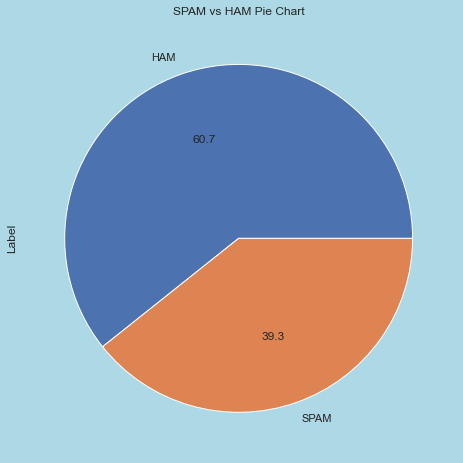

In [12]:
plot = finalDataSet["Label"].value_counts().plot(kind="pie",labels = ["HAM","SPAM"],figsize=(8,8),autopct="%.1f",title ="SPAM vs HAM Pie Chart")

### 5.b. Word clouds for spam and ham

In [13]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append('subject')

def showWordCloud(data,title):
    wordcloud = WordCloud(stopwords = set(stopwords),max_font_size=30,max_words=80).generate(data)
    plt.figure(figsize=(12,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Ham Word Cloud

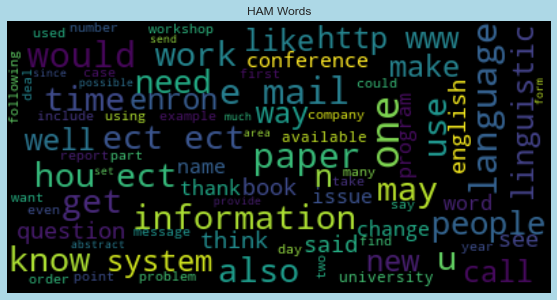

In [14]:
ham =""

for i in range(len(x_cleaned)) :
    line = x_cleaned[i]
    if finalDataSet["Label"].values[i]==0:
        ham += line
        
showWordCloud(ham,"HAM Words")

- Spam Word Cloud

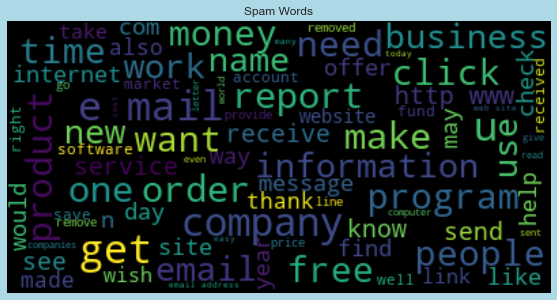

In [15]:
ham =""

for i in range(len(x_cleaned)) :
    line = x_cleaned[i]
    if finalDataSet["Label"].values[i]==1:
        ham += line
        
showWordCloud(ham,"Spam Words")

### 6.a. Tokenization

In [16]:

nltk.download('punkt')
x_tokenized = [nltk.word_tokenize(text) for text in x_cleaned]
del x_cleaned
print(x_tokenized[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'boxes', 'with', 'credit', 'applications', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'stores', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', 'use', 'our', 'effective', 'script', 'which', 'tells', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customers', 'hundreds', 'of', 'dollars', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', 'to', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'checks', 'your', 'compensaation', 'will', 'be', 'for', '

### 6.b. Lemmatization

In [17]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]
del x_tokenized
print(x_lemmatized[0])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'box', 'with', 'credit', 'application', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'store', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', 'use', 'our', 'effective', 'script', 'which', 'tell', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customer', 'hundred', 'of', 'dollar', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', 'to', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'check', 'your', 'compensaation', 'will', 'be', 'for', 'every', '

- Removing Stopwords

In [18]:

x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]
del x_lemmatized
clubbed_text = [' '.join(x) for x in x_prepared]
del x_prepared
print(clubbed_text[0])
finalDataSet['Body'] = clubbed_text

great part time summer job display box credit application need place small owner operated store area introduce store owner manager use effective script tell little display box save customer hundred dollar drawing card business make every app sent find good spot counter place box say nothing need done need name address company send commission check compensaation every box place becoming representative could also earn commission application came store course much profitable plan pay month year small effort call code hour receive detail removed mailing list type b hotmail com area remove area new e mail send


### 6.c. Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=20000)
x_vectorized = vectorizer.fit_transform(clubbed_text).toarray()


print(x_vectorized.shape)
print(x_vectorized[:2])


(18650, 20000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 6.d. TF-IDF weighting

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), 
                             stop_words="english", min_df = 10, max_df = 0.95,
                             max_features = 20000)
## fitting and transforming data
count_vect.fit(clubbed_text)

## getting train and test features
x_vectorized = count_vect.transform(clubbed_text)

print(x_vectorized.shape)
print(x_vectorized[:2])

(18650, 20000)
  (0, 19888)	0.05777154647312691
  (0, 18753)	0.05538551886331337
  (0, 18299)	0.07420379186004081
  (0, 17867)	0.04696855195201727
  (0, 17576)	0.15237101914977116
  (0, 17574)	0.08170050556293512
  (0, 17230)	0.09609541754382064
  (0, 16979)	0.28201980871032367
  (0, 16702)	0.10609704635410663
  (0, 16354)	0.16414788497785293
  (0, 15900)	0.05948920730987377
  (0, 15818)	0.1202759056872621
  (0, 15648)	0.10983899750703363
  (0, 15544)	0.06937257149758379
  (0, 15525)	0.07667818019080268
  (0, 14904)	0.09666738617923042
  (0, 14762)	0.11696149960582213
  (0, 14761)	0.11553482180145995
  (0, 14756)	0.07767755499472914
  (0, 14742)	0.07415330991150865
  (0, 14406)	0.06957128946487373
  (0, 13830)	0.10893287418574395
  (0, 13217)	0.07518840573427858
  (0, 13191)	0.208355454168776
  (0, 12818)	0.07673558286294009
  :	:
  (1, 3736)	0.11204390814378991
  (1, 3342)	0.0738753371414525
  (1, 3105)	0.146118243506943
  (1, 3079)	0.0712947298336163
  (1, 2702)	0.06749922867102492
 

### 7. Find top N ham and spam words in messages and visualize them either by plot or word cloud.

- utility to count words

In [21]:
from collections import defaultdict,Counter
def generate_ngrams(text,n_gram):
    word = [token for token in str(text).lower().split(" ") if token !=""]
    ngrams = zip(*[word[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]
def freq_ngrams(text,n_gram):
    freq_dict = defaultdict(int)
    for sent in text:
        for w in generate_ngrams(sent,n_gram):
            freq_dict[w] += 1
    freq_dict = dict(freq_dict)
    qstn_txt = pd.DataFrame(sorted(freq_dict.items(),key=lambda x: x[1],reverse=True))
    qstn_txt.columns = ["word","wordcount"]
    return qstn_txt
def plot_freq_ngrams(text,n_gram,range,title):
    qstn_txt = freq_ngrams(text,n_gram)
    fig = plt.figure(figsize=(20,5))
    plt.bar(qstn_txt.word[0:range],qstn_txt.wordcount[0:range])
    plt.xticks(rotation=90)
    plt.xlabel("Words",fontsize=15)
    plt.xlabel("Counts",fontsize=15)
    plt.title(title,fontsize=20)
    return plt.show()

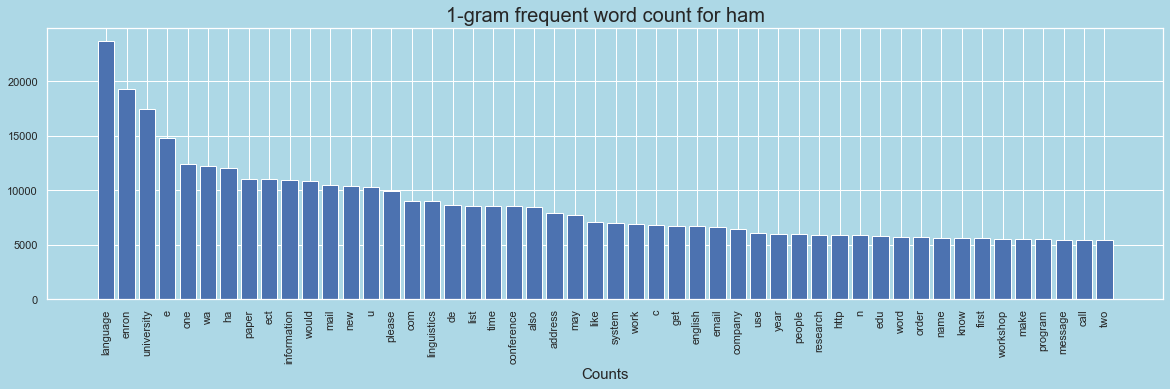

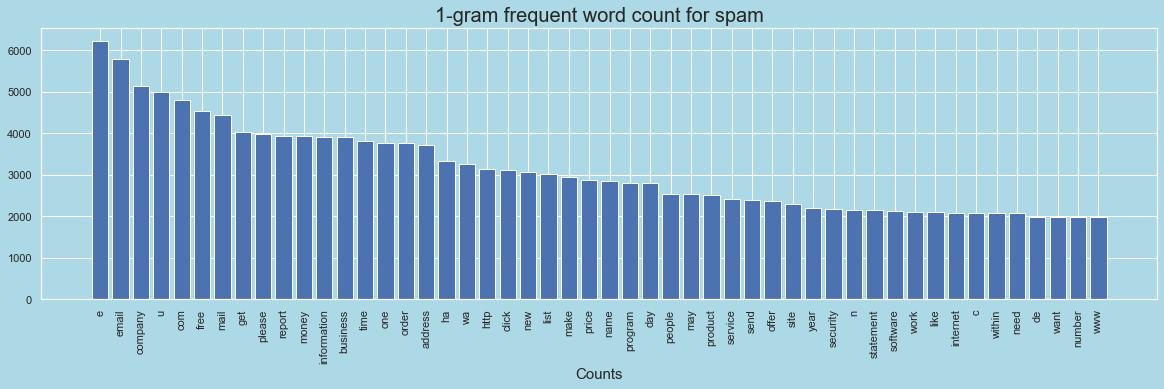

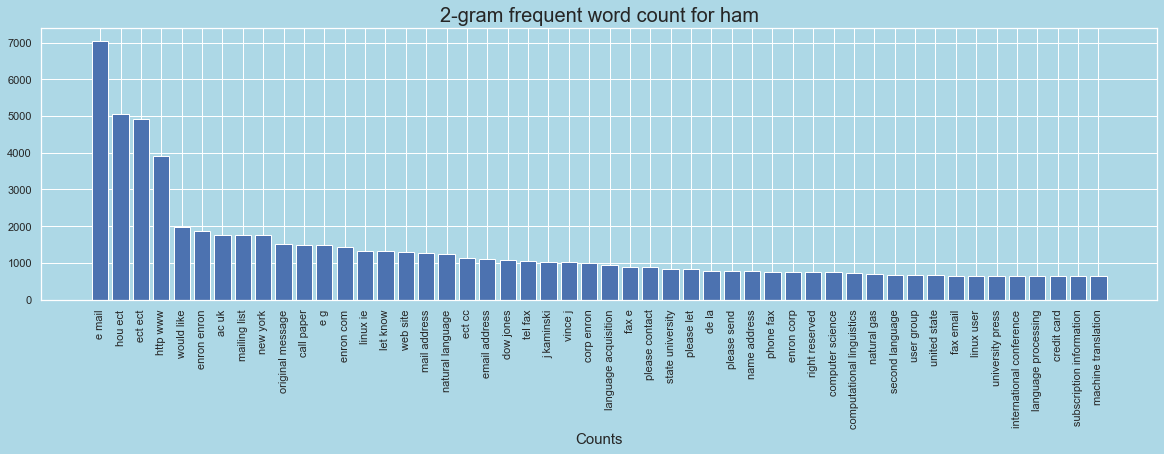

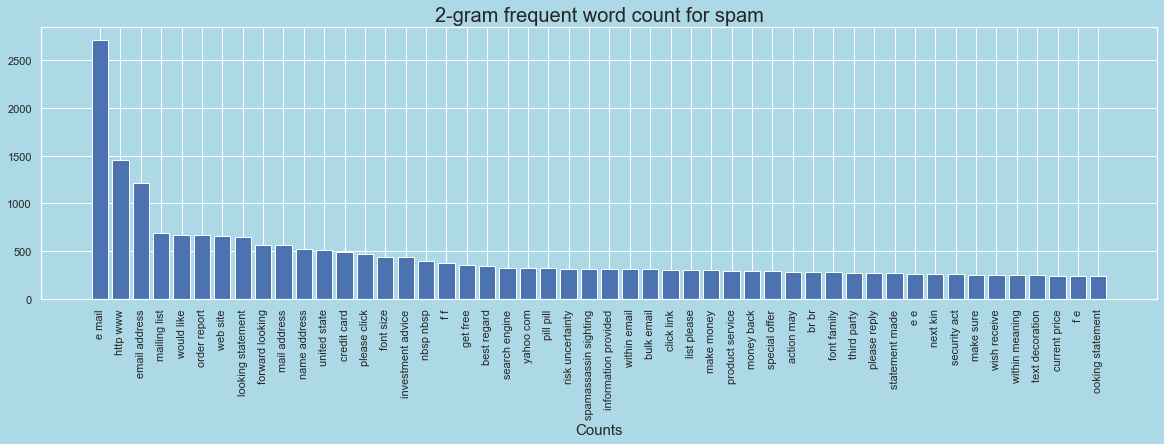

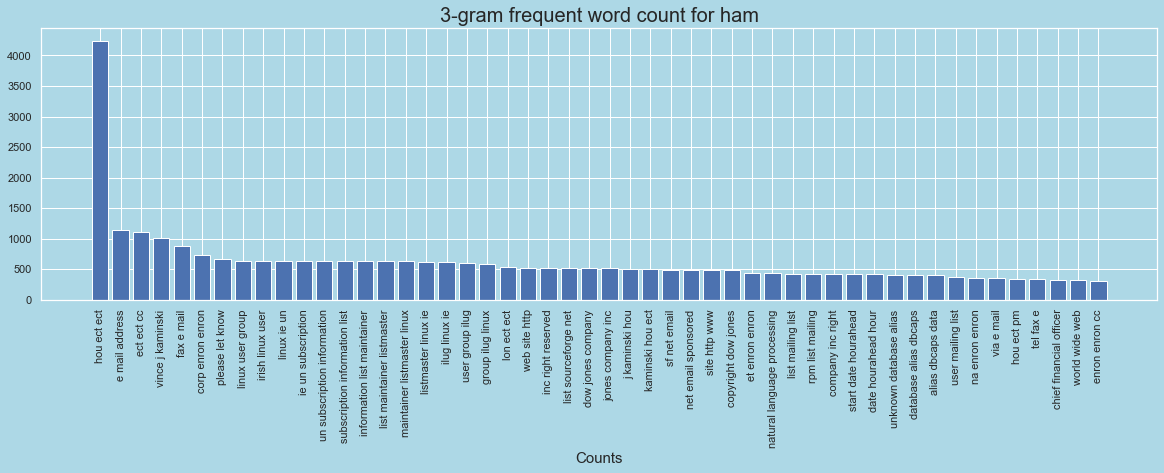

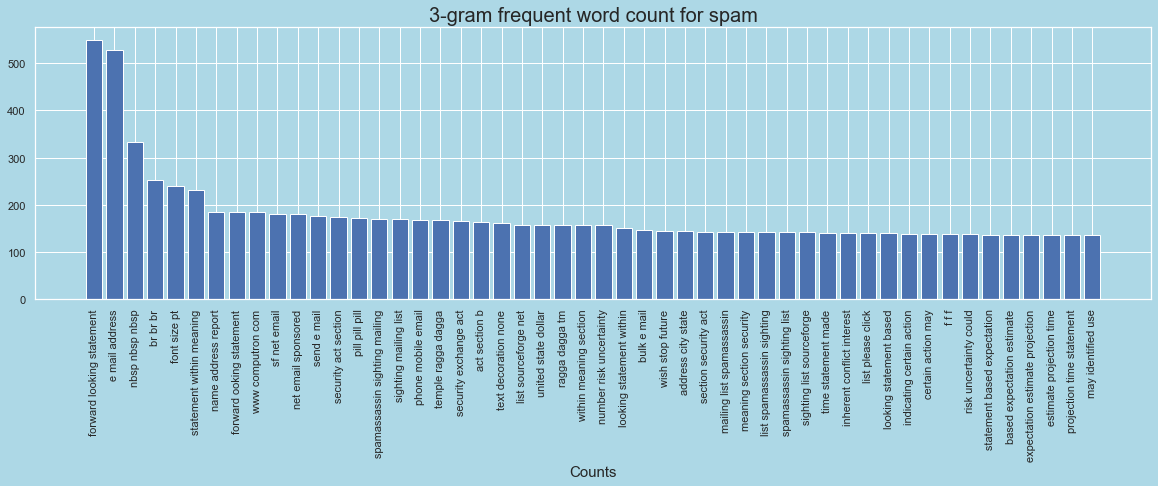

In [22]:
for n_g in range(3):
    plot_freq_ngrams(finalDataSet[finalDataSet['Label'] == 0]["Body"], n_gram=n_g+1, range=50, 
            title=f"{n_g+1}-gram frequent word count for ham")
    plot_freq_ngrams(finalDataSet[finalDataSet['Label'] == 1]["Body"], n_gram=n_g+1, range=50, 
            title=f"{n_g+1}-gram frequent word count for spam")

- Top 30 Ham

In [23]:
hamCounts = freq_ngrams(finalDataSet[finalDataSet['Label'] == 0]["Body"], n_gram=1)
spamCounts = freq_ngrams(finalDataSet[finalDataSet['Label'] == 1]["Body"], n_gram=1)

print('Top 30 Ham:')
print(hamCounts[:30])

Top 30 Ham:
           word  wordcount
0      language      23714
1         enron      19273
2    university      17416
3             e      14774
4           one      12421
5            wa      12236
6            ha      12023
7         paper      11028
8           ect      11007
9   information      10909
10        would      10853
11         mail      10471
12          new      10407
13            u      10317
14       please       9973
15          com       9007
16  linguistics       8971
17           de       8681
18         list       8586
19         time       8538
20   conference       8535
21         also       8486
22      address       7876
23          may       7729
24         like       7083
25       system       7010
26         work       6882
27            c       6794
28          get       6730
29      english       6720


- Top 30 Spam:

In [24]:
print(spamCounts[:30])

           word  wordcount
0             e       6234
1         email       5798
2       company       5145
3             u       4984
4           com       4814
5          free       4530
6          mail       4435
7           get       4026
8        please       3974
9        report       3936
10        money       3929
11  information       3923
12     business       3902
13         time       3816
14          one       3776
15        order       3768
16      address       3726
17           ha       3322
18           wa       3269
19         http       3135
20        click       3110
21          new       3077
22         list       3019
23         make       2952
24        price       2873
25         name       2862
26      program       2805
27          day       2798
28       people       2541
29          may       2535


### 8. Train-Test Split and perform the classification task using the Naive Bayes classification model.
#
1. Find probabilities of the top 30 words.
2. What problem does smoothing handle? Use the smoothing technique with naive Bayes to predict the sentences in the test split.
2. Draw confusion matrix, ROC, AUC. (You can use the sklearn library)

- Test Train split

In [25]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x_vectorized,finalDataSet["Label"],test_size=0.20,random_state=42,stratify=finalDataSet["Label"])
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((14920, 20000), (3730, 20000), (14920,), (3730,))

-  Perform the classification task using the Naive Bayes classification model.

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
clf_nb = MultinomialNB()
param_grid = {'alpha':[10** x for x in range(-3,3)]}
clf = RandomizedSearchCV(clf_nb,param_grid,cv=5,scoring="accuracy",return_train_score=True,verbose=True,n_jobs=-1)
clf.fit(xtrain,ytrain)
print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

C:\Users\debon\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best cross-validation score: 0.95
Best parameters:  {'alpha': 0.1}


- Algo fitting

In [27]:
clf_nb_final = MultinomialNB(alpha=clf.best_params_['alpha'])
clf_nb_final.fit(xtrain,ytrain)


print(f"train accuracy score {clf_nb_final.score(xtrain, ytrain) * 100 : .2f}%")

train accuracy score  96.41%


### 8.a. Find probabilities of the top 30 words.


In [28]:
freq_ngrams(finalDataSet[finalDataSet['Label'] == 1]["Body"], n_gram=5)

word  wordcount
0                                        br br br br br        234
1                              nbsp nbsp nbsp nbsp nbsp        232
2                   within meaning section security act        142
3       spamassassin sighting mailing list spamassassin        142
4           sighting mailing list spamassassin sighting        142
...                                                 ...        ...
592518                    send blank email mailto adsub          1
592519                 blank email mailto adsub btamail          1
592520                   email mailto adsub btamail net          1
592521                      mailto adsub btamail net cn          1
592522                      adsub btamail net cn remove          1

[592523 rows x 2 columns]

In [29]:

spam_ngrams = freq_ngrams(finalDataSet[finalDataSet['Label'] == 1]["Body"], n_gram=5)[:30]
spam_ngrams_vector= count_vect.transform(spam_ngrams["word"]) 

spam_ngrams['proba'] = clf_nb_final.predict_proba(spam_ngrams_vector)[:,1]

print(spam_ngrams)

                                                 word  wordcount     proba
0                                      br br br br br        234  0.861205
1                            nbsp nbsp nbsp nbsp nbsp        232  0.960296
2                 within meaning section security act        142  0.999434
3     spamassassin sighting mailing list spamassassin        142  0.997451
4         sighting mailing list spamassassin sighting        142  0.998871
5             mailing list spamassassin sighting list        142  0.998471
6         list spamassassin sighting list sourceforge        142  0.999345
7          spamassassin sighting list sourceforge net        142  0.997257
8            forward looking statement within meaning        136  0.999763
9     statement based expectation estimate projection        136  0.999879
10         based expectation estimate projection time        136  0.999844
11     expectation estimate projection time statement        136  0.999885
12            estimate pr

### c. Draw confusion matrix, ROC, AUC. (You can use the sklearn library)

- Accuracy Analysis

In [30]:
from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,auc,roc_auc_score,roc_curve
ypred = clf_nb_final.predict(xtest)
ypred_proba = clf_nb_final.predict_proba(xtest)

print(f"test accuracy score: {accuracy_score(ytest, ypred)*100:.2f}%")
print(f"test classification report:\n {classification_report(ytest, ypred)}")
print(f"confusion matrix:\n{confusion_matrix(ytest,ypred)}")

test accuracy score: 94.83%
test classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2264
           1       0.97      0.89      0.93      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.94      0.94      3730
weighted avg       0.95      0.95      0.95      3730

confusion matrix:
[[2229   35]
 [ 158 1308]]


- ROC Graph 

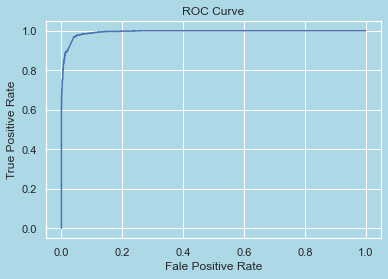

In [31]:
fpr,tpr,thrs = roc_curve(ytest,ypred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel("Fale Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

- AUC Calculation

In [32]:
auc_score = auc(fpr, tpr)
print(f"the auc score is {auc_score :.4f}")

the auc score is 0.9936
